# Modelo analítico de temperatura - Placa

Modelo térmico de temperatura para uma placa em subducção (Stein e Wysession, 2015).

\begin{equation*}
    T(x,z) = T_m \Big ( 1+2\sum_{n=1}^{\infty} c_n \exp{\Big ( -\frac{\beta_n x}{L}\Big )} \sin{\Big ( \frac{n\pi z}{L}\Big )} \Big ) \\
    c_n = \frac{(-1)^n}{n\pi} \\
    \beta_n = (R^2 + n^2\pi^2)^{1/2}
\end{equation*}

onde $T_m$ é a temperatura do manto circundante; $L$ é a espessura da placa; e $R=vL/(2\kappa)$, onde, por sua vez, $v$ é a velocidade da placa em subducção em $km/ano$ e $\kappa$ é a difusividade térmica.

## Bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf

## Parâmetros

In [2]:
Tm = 1300.
L  = 80.
v  = 50e-6 # km/ano
k  = 1.0E-6
R  = v * L / (2 * k)
# e = 1e-4

## Função modelo analítico de temperatura para a placa

In [3]:
def t(x,z,s,tm,limit):
    for j in xrange(np.size(z)):
        for i in xrange(np.size(x)):
            h = 0.
            for n in xrange(1,limit):
                c = pow(-1,n) / (n * np.pi) 
                b = np.sqrt(pow(R,2) + (pow(n,2) * pow(np.pi,2))) - R 
                h = c * np.exp(( - b * x[i]) / (L)) * np.sin((n * np.pi * z[j]) / (L)) + h
            s[i,j] = tm[i] * (1 + 2 * h)
            if (s[i,j]<0):
                s[i,j]=0
    return s

## Grid

In [4]:
xMin,xMax,xNum    = 0,1500,101
zMin,zMax,zNum    = 0,L,101
tmMin,tmMax,tmNum = 1300,1300,101
nIter             = 1000

x  = np.linspace(xMin,xMax,xNum)
z  = np.linspace(zMin,zMax,zNum)
tm = np.linspace(tmMin,tmMax,tmNum)
s  = np.zeros(shape=(np.size(x),np.size(z)))
s  = t(x,z,s,tm,nIter)

## Plot

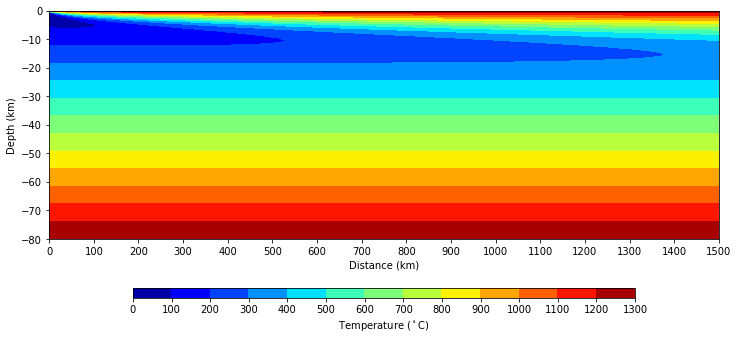

In [5]:
extent = (np.max(x),0,0,L)
extent = (0,np.max(x),-L,0)
levels = np.linspace(0,1300,14)
ticks  = np.linspace(0,1300,14)
fig = plt.figure(figsize=(12,6))
cs = plt.contourf(np.transpose(s),levels,extent=extent,cmap="jet")
fig.colorbar(cs,orientation="horizontal",ticks=ticks,label="Temperature ($^\circ$C)",aspect=50,shrink=0.75)
# plt.title(r'Estrutura t$\'e$rmica de uma placa em subduccao')
plt.xticks(np.linspace(0,np.max(x),16))
plt.ylabel("Depth (km)")
plt.xlabel("Distance (km)")
plt.savefig('thermal_structure.pdf')

# Modelo analítico de temperatura - Manto

Temperatura para o manto considerando um gradiente adiabático de temperatura (Stein e Wysession, 2015).

\begin{equation*}
T^{K}(z)=T^{K}_{0}\exp{\Big (\frac{\alpha g}{C_p}(z-z_0)\Big )}
\end{equation*}

onde $T_0^K$ é a temperatura (em Kelvin) no topo do manto, $C_p$ é a capacidade térmica, $\alpha$ é ocoeficiente de expansividade térmica e $g$ é a gravidade.

## Parâmetros

In [7]:
T0_K = 1573. # Kelvin
a    = 1.0e-5
g    = 10
C_p  = 2.0e3 # 1.5e3
z0,z1 = L*1000,700.*1000

def tt(zz,ss):
    for j in xrange(np.size(zz)):
        hh = np.exp((( a * g) / (C_p)) * (zz[j] - z0)) 
        ss[j] = T0_K * hh
    return ss

## Grid 

In [8]:
xx = np.linspace(0,1300,101)
zz = np.linspace(z0,z1,101)
ss = np.zeros(np.size(zz))
ss = tt(zz,ss)

## Plot

1349.5266976135001 1300.0
1622.5266976135001 1573.0


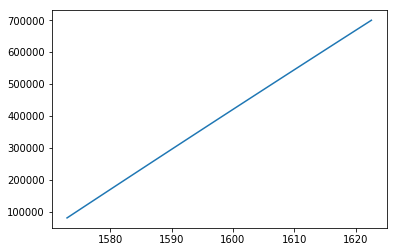

In [9]:
plt.plot(ss,zz)
print np.max(ss)-273.,np.min(ss)-273.
print np.max(ss),np.min(ss)

# Função erro - Rampa de profundidade

O código principal \textit{temperatura.py} separa um hexaedro (dados) em regiões de intervalos de longitude. Para garantir uma transição suave de temperatura, a função erro foi utilizada para criar uma tendência para a interface Litosfera-Astenosfera. Essa interface suava é utilizada posteriormente para calcular a temperatura em função dessa espessura variável da listosfera.

\begin{equation*}
    z(x)=\frac{z_1+z_0}{2} + \frac{z_1-z_0}{2}erf{\Big(\frac{4x}{L}-2\Big )}
\end{equation*}

onde $z_0$ é a profundidade inicial, $z_1$ é a profundidade final, $L$ é o comprimento horizontal e $x$ é a posição no intervalo $[0,L]$.

## Parâmetros e Grid

In [10]:
z0 = -80.
z1 = -200.
x0 = 0.
x1 = 800.
num = 101

x = np.linspace(x0,x1,num)
z = np.linspace(z0,z1,num)
for i in xrange(num):
    z[i] = z0 + ((z1 - z0)/2.)*erf((x[i]/(x1/4.)-2)) + ((z1 - z0)/2.)

## Plot

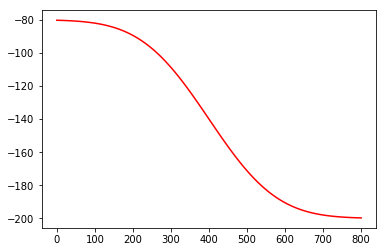

In [11]:
plt.plot(x,z,color=(1,0,0))
plt.show()